In [1]:
# Execute this cell once to setup the notebook environment, then ignore it

# set the path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# load the notebook's style sheet
from IPython.core.display import HTML
css_file = 'style.css'
HTML(open(css_file, "r").read())

# embed plots
%matplotlib inline

from regression.toolkit import logistic, plot, generate_classification_data, SGDClassifier, hstack, logistic_regression_boundary

# Logistic Regression

Logistic regression is about fitting a function to non continious labeled data. For now we will asume one feature in out input dataset and two labels (0 or 1, black or white, fast or slow, whatever).

The function we will be fitting is the logistic function, which is not linear as the one we saw in linear regression. This is because the data won't be linear either. The data are labels representing classes so they look like steps. This will become clear soon.

This is the logistic function: $f(x) = \frac{1}{1-e^{-\theta_0-\theta_1 \cdot x}}$

In the box below, play with the values of the parameters $\theta_0$ and $\theta_1$ and get a sense on the posible shapes of this function.

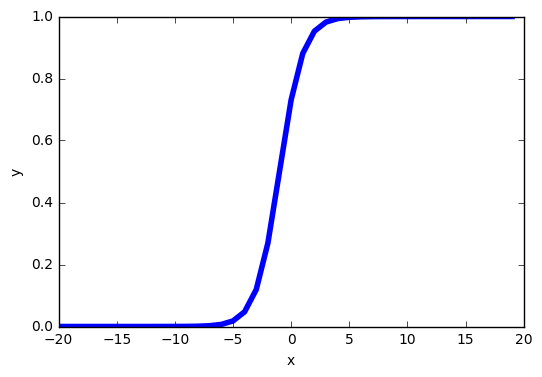

In [2]:
theta_0 = 1
theta_1 = 1

theta = [theta_0, theta_1]
x = range(-20, 20)

f_x = logistic(theta, x)
plot(x, f_x, line=True)


Now, given the data in x and y, try to fit a logistic function by palying with the values in $\theta_0$ and $\theta_1$:

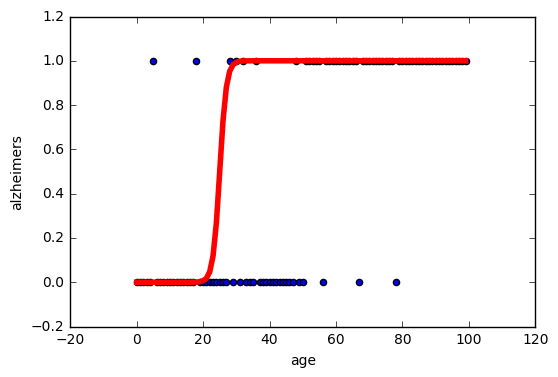

In [3]:
age, alzheimers = generate_classification_data()

theta_0 = -25
theta_1 = 1

theta = [theta_0, theta_1]

f_x = logistic(theta, age)
plot(age, alzheimers, predictions=f_x, x_label="age", y_label="alzheimers")

What about a classification problem with two features?

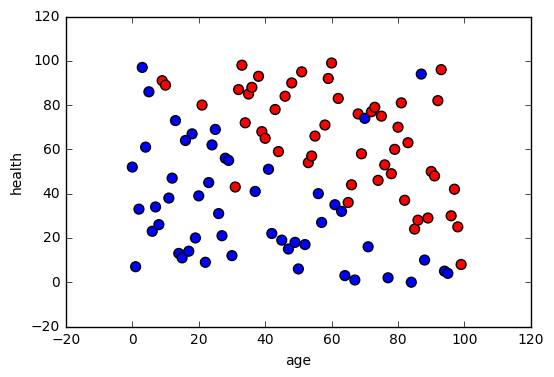

In [4]:
(x1, x2), y = generate_classification_data(dim=2, noise_level=0.1)
plot(x1, x2, y, x_label="age", y_label="health")

Try to fit a logistic function to classify this data by playing with theta.

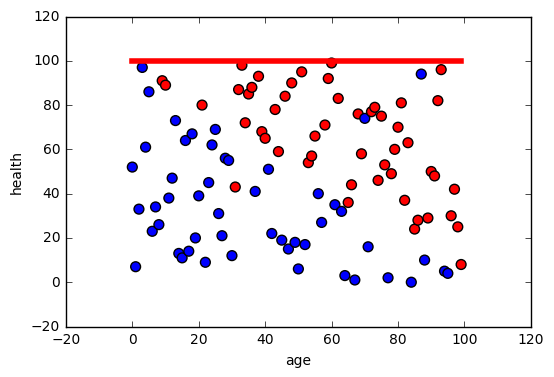

In [27]:
theta_0 = 4000
theta_1 = -0
theta_2 = -40
theta = [theta_0, theta_1, theta_2]
x1_boundary, x2_boundary = logistic_regression_boundary(theta)
plot(x1, x2, label = y, x_boundary=x1_boundary, y_boundary=x2_boundary, x_label="age", y_label="health")

Now fit this same data using SGDClassifier.

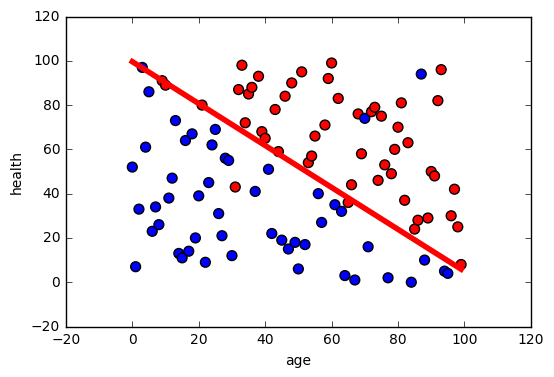

In [6]:
x = hstack(x1, x2)

logistic_regression = SGDClassifier(loss='log', n_iter=10000, eta0=0.0001)
logistic_regression.fit(x, y)

x1_boundary, x2_boundary = logistic_regression_boundary(logistic_regression)
plot(x1, x2, label = y, x_boundary=x1_boundary, y_boundary=x2_boundary, x_label="age", y_label="health")